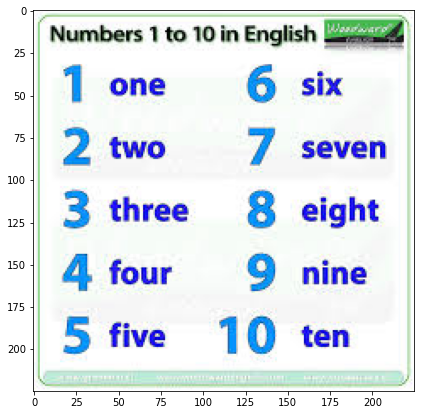


------------------Text retrived from the image-----------------

‘Numbers 1 to 10 in English 7
1 one 6 six

2 two 7 seven

3 three § eight
4 four 9 nine
5 five 10 ten

 



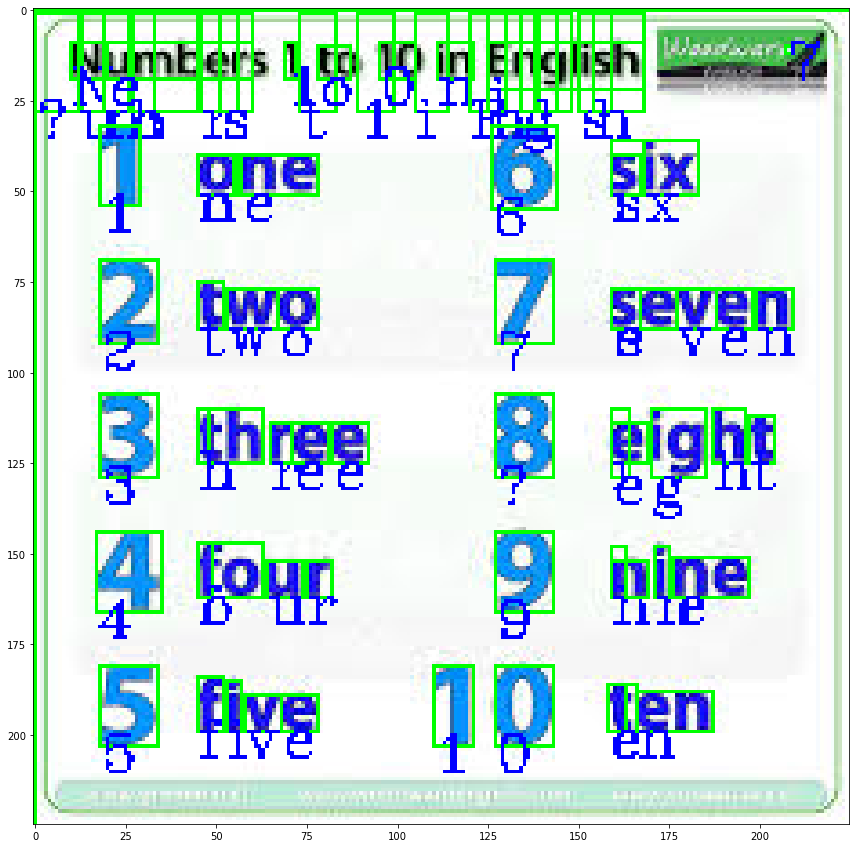

In [88]:
import pytesseract
import cv2
import matplotlib.pyplot as plt

# This is the path of the tesseract command. bcoz pytessarct is just the google api wrapper for the tessaract in python.
path = "/usr/bin/tesseract"

# setting the path for the pytesseract to find the commands of tesseract. so pytesseract can use it.
pytesseract.pytesseract.tesseract_cmd = path

# Readinf the image from the directory
img = cv2.imread('images/ocr1.jpeg')

# This is our image
plt.figure(figsize = (7, 7))
plt.imshow(img, cmap = 'gray')
plt.show()

# converting the image into string
text = pytesseract.image_to_string(img)

print()
print("------------------Text retrived from the image-----------------")
print()
print(text)

# finding a bounding box co-ordinate for each object in the image 
bounding_boxes = pytesseract.image_to_boxes(img)

# Here first two values for x, y which is the center of the object in the bounding box, 3,4 - w, h of the bounding boxes

img_w, img_h, _ = img.shape

# Detecting the characters and drawing bounding boxes in given image

for box in bounding_boxes.splitlines():
    box = box.split(' ')
    
    # (x, y) center of the bounding box and (w, h) width and height of the bounding box
    x, y, w, h = int(box[1]), int(box[2]), int(box[3]), int(box[4])
    
    # Using this co-ordinates, we gonna draw bounding box using cv2.rectangle method
    # Third and fourth parameter of the rectangle is color and the thinkness of the bounding box
    cv2.rectangle(img, (x, img_h - y), (w, img_h - h), (0, 255, 0), 1)
    cv2.putText(img, box[0], (x, img_h - y  + 7), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 255), 1)

plt.figure(figsize = (15, 15))
plt.imshow(img)
    